In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv")

In [4]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [6]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

In [7]:
x.shape, y.shape

((387, 5), (387, 1))

In [9]:
from sklearn.linear_model import LinearRegression
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_

array([[95.52010745]])

In [10]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

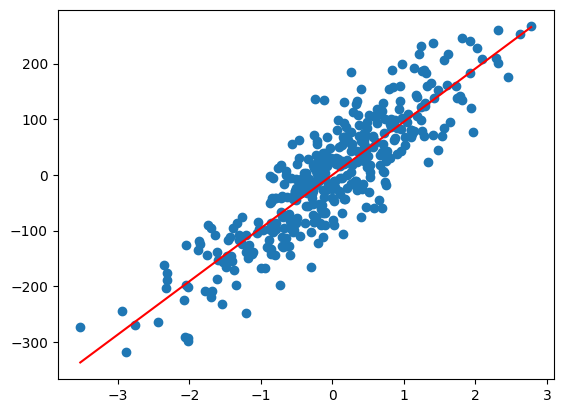

In [12]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [16]:
binary.score(x[[1]], y)

0.7699743283650629

In [17]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

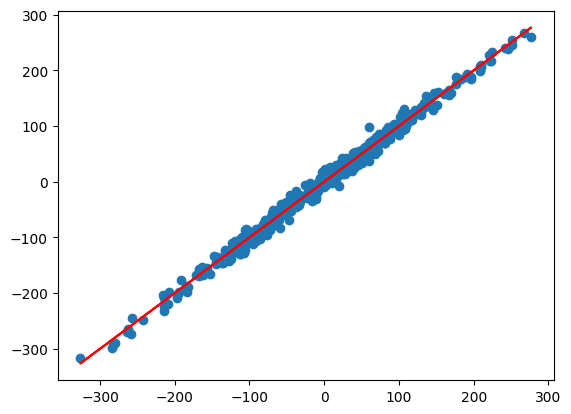

In [18]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

# Задания для самостоятельной работы

In [53]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML1.2%20multivariate/data/13_x.csv", header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML1.2%20multivariate/data/13_y.csv", header=None)

Выбран датасет под номером 13 (По варианту)

### 1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

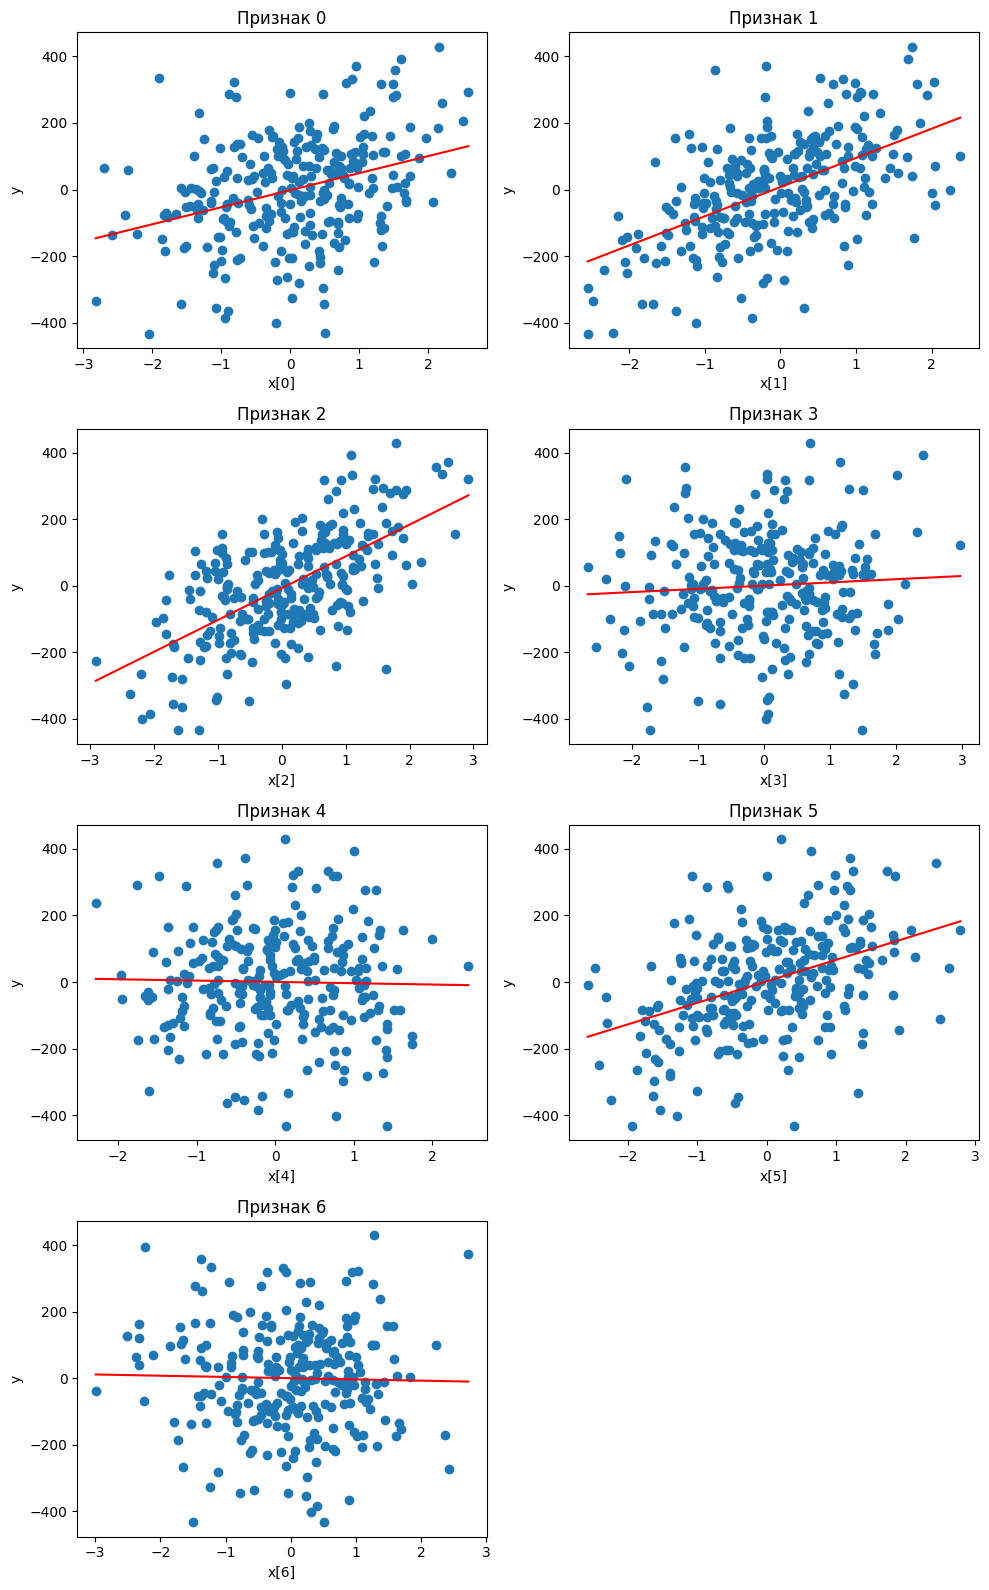

In [54]:
binary_arr = []
for i in range(x.shape[1]):
    binary_arr.append(LinearRegression().fit(x[[i]], y))

n_features = x.shape[1]
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
axes = axes.flatten()

for i in range(n_features):
    ax = axes[i]
    ax.scatter(x[i], y)
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape(-1, 1)
    yy = binary_arr[i].predict(xx)
    ax.plot(xx, yy, color='r')
    ax.set_title(f'Признак {i}')
    ax.set_xlabel(f'x[{i}]')
    ax.set_ylabel('y')

for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [55]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, X):
        self.b0 = 0
        self.b = np.zeros(X.shape[1])

    def df_to_array(self, X):
        """Обработка DataFrame в numpy массив"""
        if isinstance(X, pd.DataFrame):
            return X.values
        return X
    
    def predict(self, X):
        X = self.df_to_array(X)
        return self.b0 + np.dot(X, self.b)
    
    def error(self, X, Y):
        X = self.df_to_array(X)
        Y = np.array(Y).ravel()
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))
    
    def score(self, X, Y):
        Y = np.array(Y).ravel()
        Y_pred = self.predict(X)
        ss_res = np.sum((Y - Y_pred) ** 2)
        ss_tot = np.sum((Y - np.mean(Y)) ** 2)
        return 1 - (ss_res / ss_tot)
    
    def fit(self, X, Y, alpha=1, accuracy=0.0001, max_steps=5000, max_iter=10000):
        X = self.df_to_array(X)
        Y = np.array(Y).ravel()

        steps, errors = [0], [self.error(X, Y)]

        for step in range(1, max_iter + 1):
            Y_pred = self.predict(X)

            dJ0 = np.mean(Y_pred - Y)
            dJ = np.dot(X.T, (Y_pred - Y)) / len(X)

            self.b0 -= alpha * dJ0
            self.b -= alpha * dJ

            new_err = self.error(X, Y)
            old_err = errors[-1]
   
            steps.append(step)
            
            if new_err > old_err:
                alpha = alpha / 2
                self.__init__()
            
            errors.append(self.error(X, Y))

            if new_err < old_err and old_err - new_err < accuracy:
                print("Штатный выход из цикла")
                break
            
        else:
            print("Закончились итерации")
            
        return steps, errors

В этой модели поменяли такие вещи:
1. b стал массивом numpy (для его генерации пришлось добавить х при инициализации) 
2. dataframe переводятся в массивы numpy тк вся логика перешла на матричные вычисления
3. Были отредактированны формулы error, score, fit, predict. Теперь используются их аналоги для множественной регрессии 

In [56]:
model = Model(x)
steps, errors = model.fit(x, y)
y_pred = model.predict(x)
r2 = model.score(x, y)
print("R^2:", r2)

Штатный выход из цикла
R^2: 0.9962083200152277


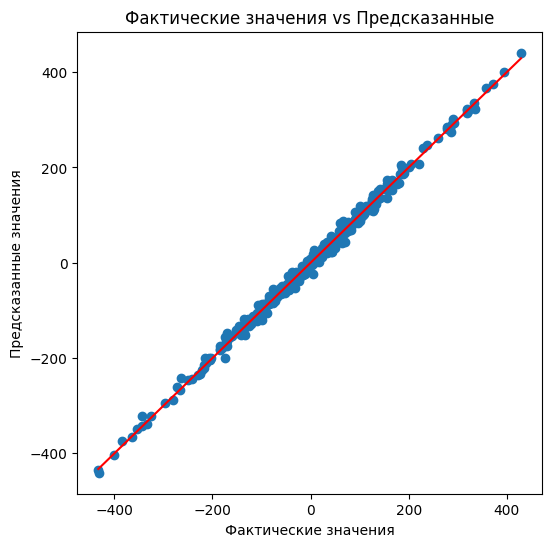

In [57]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Фактические значения vs Предсказанные')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.show()

### 3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly_2degree_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_3degree_converter= PolynomialFeatures(degree=3, include_bias=False)
poly_10degree_converter = PolynomialFeatures(degree=10, include_bias=False)

In [76]:
poly_2degree_features_list = []
poly_3degree_features_list = []
poly_10degree_features_list = []
for i in range(x.shape[1]):
    poly_2degree_features_list.append(poly_2degree_converter.fit_transform(x[[i]]))
    poly_3degree_features_list.append(poly_3degree_converter.fit_transform(x[[i]]))
    poly_10degree_features_list.append(poly_10degree_converter.fit_transform(x[[i]]))

print(x.shape)
print(poly_2degree_features_list[0].shape)
print(poly_3degree_features_list[0].shape)
print(poly_10degree_features_list[0].shape)

poly_2degree_models_list = []
poly_3degree_models_list = []
poly_10degree_models_list = []
for i in range(x.shape[1]):
    poly_2degree_models_list.append(LinearRegression().fit(poly_2degree_features_list[i], y))
    poly_3degree_models_list.append(LinearRegression().fit(poly_3degree_features_list[i], y))
    poly_10degree_models_list.append(LinearRegression().fit(poly_10degree_features_list[i], y))

poly_2degree_scores_list = []
poly_3degree_scores_list = []
poly_10degree_scores_list = []
for i in range(x.shape[1]):
    poly_2degree_scores_list.append(poly_2degree_models_list[i].score(poly_2degree_features_list[i], y))
    poly_3degree_scores_list.append(poly_3degree_models_list[i].score(poly_3degree_features_list[i], y))
    poly_10degree_scores_list.append(poly_10degree_models_list[i].score(poly_10degree_features_list[i], y))


(270, 7)
(270, 2)
(270, 3)
(270, 10)


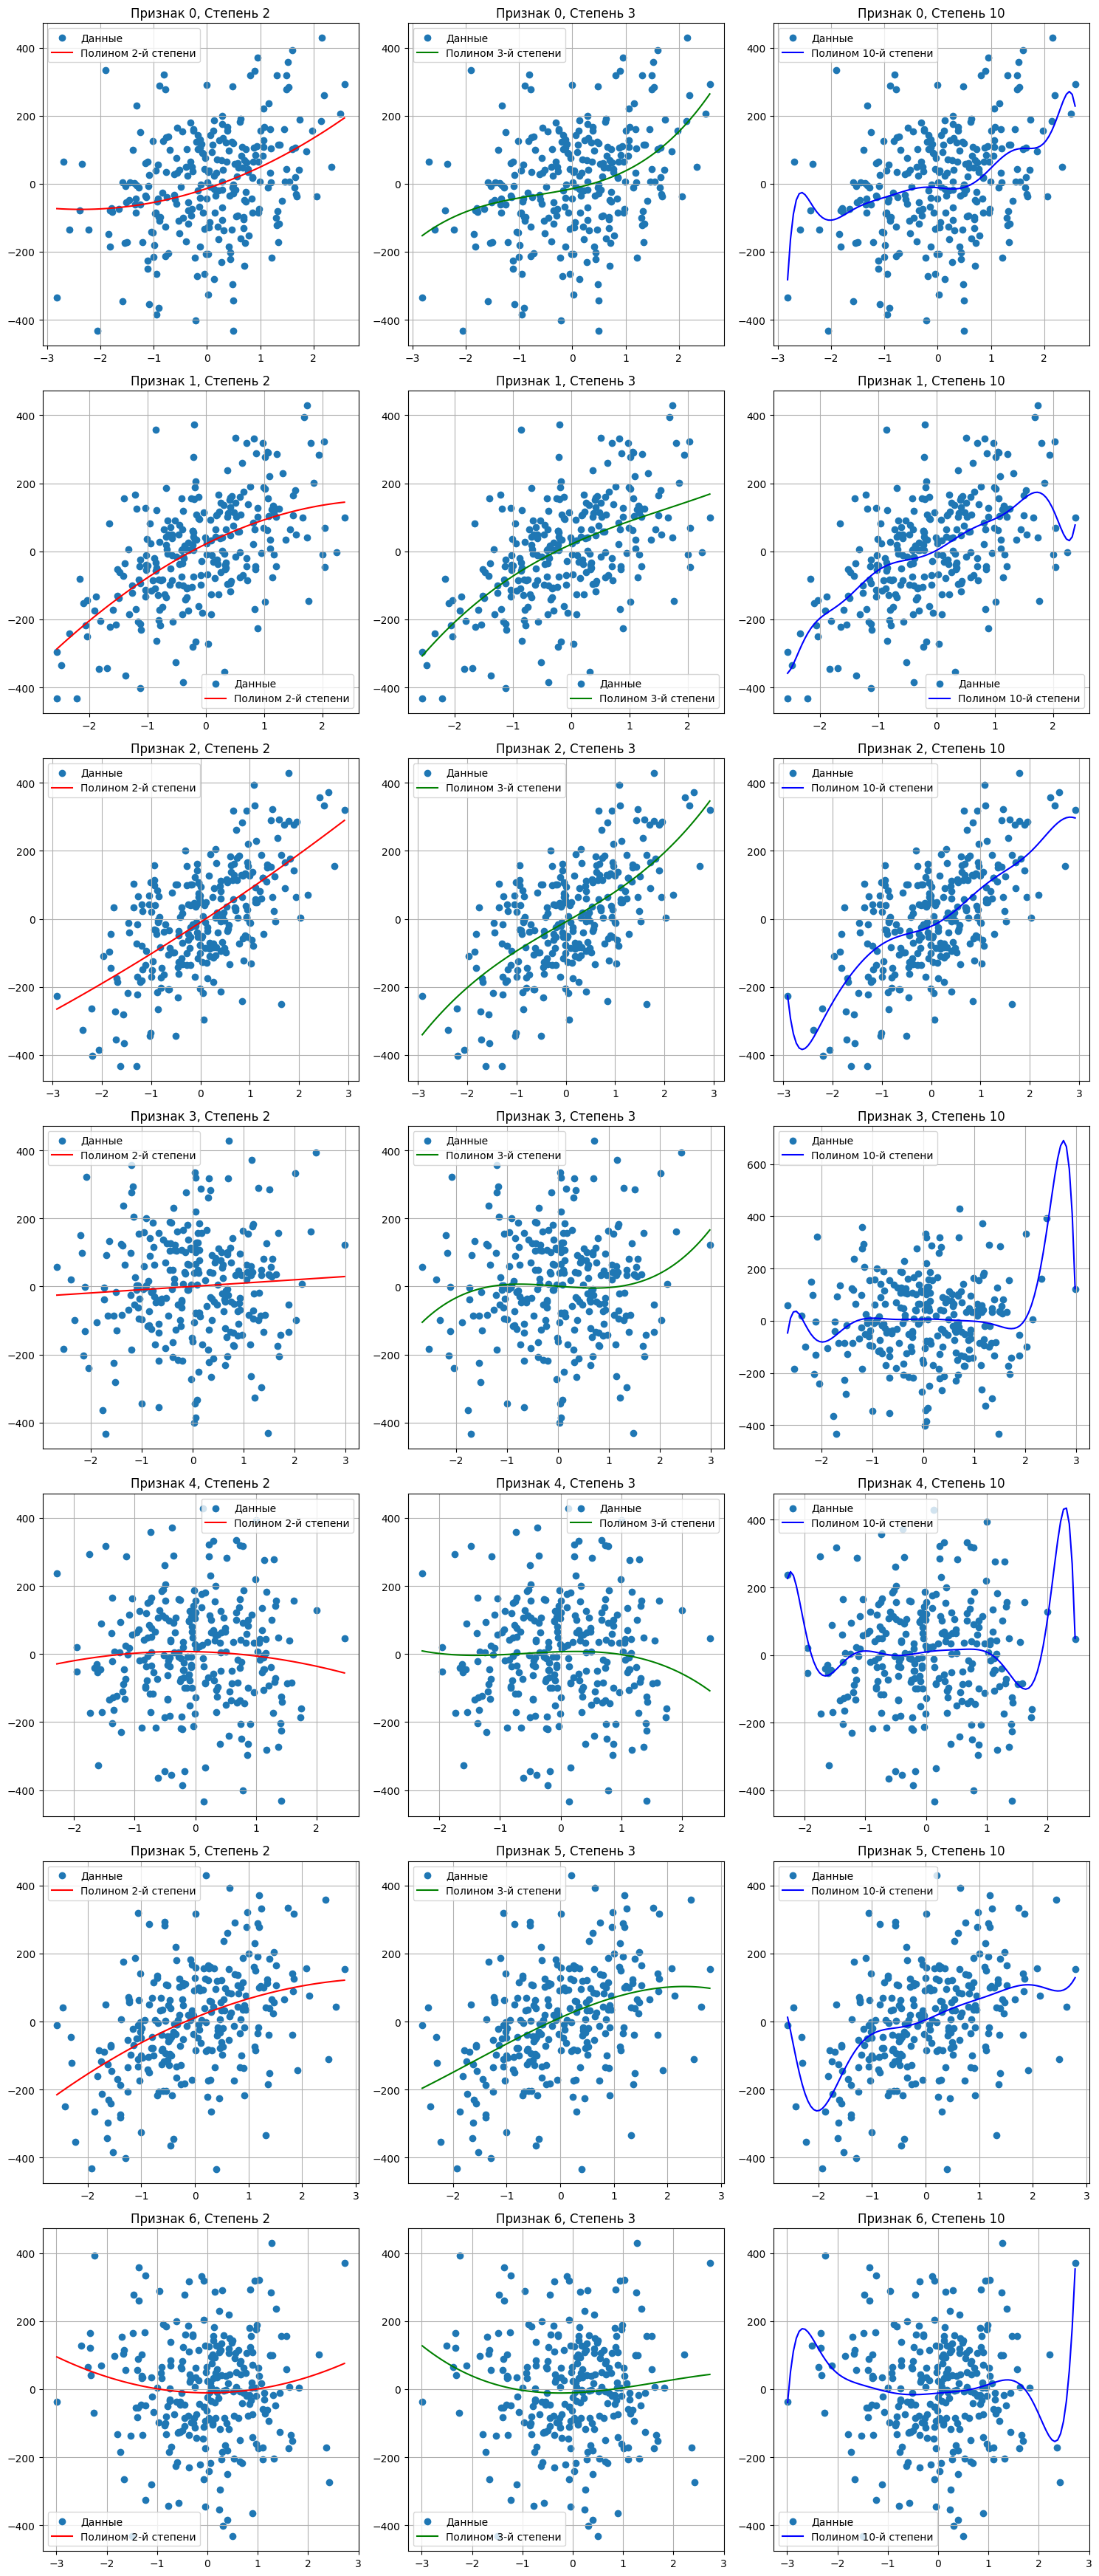

In [82]:
fig, axes = plt.subplots(x.shape[1], 3, figsize=(15, 5 * x.shape[1]))  # 3 столбца для 3 степеней

for i in range(x.shape[1]):
    xi = x[i]

    # Степень 2
    ax = axes[i, 0]
    ax.scatter(xi, y, label='Данные')
    xx = np.linspace(xi.min(), xi.max(), 100).reshape(-1, 1)
    xx_poly = poly_2degree_converter.transform(xx)
    yy = poly_2degree_models_list[i].predict(xx_poly)
    ax.plot(xx, yy, color='red', label='Полином 2-й степени')
    ax.set_title(f'Признак {i}, Степень 2')
    ax.legend()
    ax.grid(True)

    # Степень 3
    ax = axes[i, 1]
    ax.scatter(xi, y, label='Данные')
    xx_poly = poly_3degree_converter.transform(xx)
    yy = poly_3degree_models_list[i].predict(xx_poly)
    ax.plot(xx, yy, color='green', label='Полином 3-й степени')
    ax.set_title(f'Признак {i}, Степень 3')
    ax.legend()
    ax.grid(True)

    # Степень 10
    ax = axes[i, 2]
    ax.scatter(xi, y, label='Данные')
    xx_poly = poly_10degree_converter.transform(xx)
    yy = poly_10degree_models_list[i].predict(xx_poly)
    ax.plot(xx, yy, color='blue', label='Полином 10-й степени')
    ax.set_title(f'Признак {i}, Степень 10')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

#### Вывод о значимости регрессии:
У модели с полиномом второй степени можно наблюдать явно выраженную недообученность, модель плохо апроксимирует данные, модель с полиномом третьей степени справляется лучше.
У модели с полиномом десятой степени выраженное переобучение, на графике видно что модель слишком чувствительна к выбросам

### 4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [81]:
summary_table = pd.DataFrame({
    'Признак': [f'Признак {i}' for i in range(x.shape[1])],
    'R^2 (2-й степ.)': poly_2degree_scores_list,
    'R^2 (3-й степ.)': poly_3degree_scores_list,
    'R^2 (10-й степ.)': poly_10degree_scores_list,
})

# Вывод сводной таблицы
summary_table

,Признак,R^2 (2-й степ.),R^2 (3-й степ.),R^2 (10-й степ.)
0,Признак 0,0.124065,0.131420,0.142986
1,Признак 1,0.320009,0.320857,0.334132
2,Признак 2,0.393415,0.396960,0.407963
3,Признак 3,0.004055,0.014258,0.040468
4,Признак 4,0.003071,0.004425,0.032580
5,Признак 5,0.187196,0.187795,0.216482
6,Признак 6,0.010508,0.011349,0.048133


Многие признаки почти не коррелируют с целевой переменной, значимая корреляция имеется только у 1, 2, 5 признаков

У модели с полиномом второй степени можно наблюдать явно выраженную недообученность, модель плохо апроксимирует данные, модель с полиномом третьей степени справляется лучше.
У модели с полиномом десятой степени выраженное переобучение, на графике видно что модель слишком чувствительна к выбросам

### 5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
poly_2degree_mse_list = []
poly_3degree_mse_list = []
poly_10degree_mse_list = []
for i in range(x.shape[1]):
    poly_2degree_mse_list.append(mean_squared_error(poly_2degree_models_list[i].predict(poly_2degree_features_list[i]), y))
    poly_3degree_mse_list.append(mean_squared_error(poly_3degree_models_list[i].predict(poly_3degree_features_list[i]), y))
    poly_10degree_mse_list.append(mean_squared_error(poly_10degree_models_list[i].predict(poly_10degree_features_list[i]), y))

poly_2degree_mae_list = []
poly_3degree_mae_list = []
poly_10degree_mae_list = []
for i in range(x.shape[1]):
    poly_2degree_mae_list.append(mean_absolute_error(poly_2degree_models_list[i].predict(poly_2degree_features_list[i]), y))
    poly_3degree_mae_list.append(mean_absolute_error(poly_3degree_models_list[i].predict(poly_3degree_features_list[i]), y))
    poly_10degree_mae_list.append(mean_absolute_error(poly_10degree_models_list[i].predict(poly_10degree_features_list[i]), y))

summary_table_mse = pd.DataFrame({
    'Признак': [f'Признак {i}' for i in range(x.shape[1])],
    'MSE (2-й степ.)': poly_2degree_mse_list,
    'MSE (3-й степ.)': poly_3degree_mse_list,
    'MSE (10-й степ.)': poly_10degree_mse_list,
})

summary_table_mae = pd.DataFrame({
    'Признак': [f'Признак {i}' for i in range(x.shape[1])],
    'MAE (2-й степ.)': poly_2degree_mae_list,
    'MAE (3-й степ.)': poly_3degree_mae_list,
    'MAE (10-й степ.)': poly_10degree_mae_list,
})

summary_table_mse

,Признак,MSE (2-й степ.),MSE (3-й степ.),MSE (10-й степ.)
0,Признак 0,21676.043784,21494.019852,21207.822096
1,Признак 1,16827.166931,16806.194419,16477.690010
2,Признак 2,15010.647147,14922.938025,14650.638601
3,Признак 3,24645.831896,24393.340332,23744.745245
4,Признак 4,24670.178431,24636.661131,23939.946058
5,Признак 5,20113.780267,20098.961617,19389.072760
6,Признак 6,24486.142316,24465.333223,23555.062002


In [92]:
summary_table_mae

,Признак,MAE (2-й степ.),MAE (3-й степ.),MAE (10-й степ.)
0,Признак 0,115.332203,114.757603,114.459482
1,Признак 1,100.186700,100.228867,99.604342
2,Признак 2,99.864215,99.463037,98.069703
3,Признак 3,122.713783,122.655293,121.137761
4,Признак 4,122.913862,122.909467,118.978603
5,Признак 5,109.125209,109.053894,107.537606
6,Признак 6,122.459236,122.310342,119.631058


Для 1, 2, 5 признаков ошибка меньше чем для остальных признаков

### 6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [95]:
import time

In [98]:
second_degree_features = poly_2degree_converter.fit_transform(x)
third_degree_features = poly_3degree_converter.fit_transform(x)
tenth_degree_features = poly_10degree_converter.fit_transform(x)

start_time = time.time()
second_degree_model = LinearRegression().fit(second_degree_features, y)
second_degree_time = time.time() - start_time

start_time = time.time()
third_degree_model = LinearRegression().fit(third_degree_features, y)
third_degree_time = time.time() - start_time

start_time = time.time()
tenth_degree_model = LinearRegression().fit(tenth_degree_features, y)
tenth_degree_time = time.time() - start_time

print(f"Время обучения для модели 2-го порядка: {second_degree_time:.4f} секунд")
print(f"Время обучения для модели 3-го порядка: {third_degree_time:.4f} секунд")
print(f"Время обучения для модели 10-го порядка: {tenth_degree_time:.4f} секунд")

Время обучения для модели 2-го порядка: 0.0012 секунд
Время обучения для модели 3-го порядка: 0.0033 секунд
Время обучения для модели 10-го порядка: 0.5609 секунд


#### Вывод
Чем больше степень полинома, тем больше времени уходит на обучение модели

# Контрольные вопросы

1. **Как должны выглядеть данные для модели машинного обучения?**  
   Данные должны быть числовыми (или преобразованными в числовой формат), с разделением на признаки (X) и целевую переменную (y). Признаки могут быть как категориальными, так и числовыми, но категориальные необходимо преобразовать в числовые через методы кодирования (например, one-hot encoding).

2. **В чем физический смысл коэффициентов линейной регрессии?**  
   Коэффициенты линейной регрессии показывают, насколько изменение одного из признаков влияет на целевую переменную при условии, что все остальные признаки остаются постоянными.

3. **Чем множественная регрессия отличается от парной?**  
   Множественная регрессия включает несколько признаков для предсказания целевой переменной, тогда как парная регрессия использует только один признак.

4. **Какую функцию ошибки использует модель линейной регрессии?**  
   Линейная регрессия использует функцию ошибки "среднеквадратичная ошибка" (MSE, Mean Squared Error), которая измеряет среднюю квадратичную разницу между предсказанными и реальными значениями.

5. **Какие метрики эффективности можно применять для оценки регрессионных моделей?**  
   - R² (коэффициент детерминации)
   - Средняя абсолютная ошибка (MAE)
   - Среднеквадратичная ошибка (MSE)
   - Корень из средней квадратичной ошибки (RMSE)

6. **Какие еще регрессоры есть в библиотеке sklearn?**  
   В sklearn доступны такие регрессоры, как:
   - Ridge Regression (регрессия с регуляризацией L2)
   - Lasso Regression (регрессия с регуляризацией L1)
   - ElasticNet (комбинированная регуляризация L1 и L2)
   - DecisionTreeRegressor (дерево решений)
   - RandomForestRegressor (случайный лес)
   - Метод опорных векторов (SVR)

7. **Почему для визуализации модели нельзя использовать предсказанные значения по датасету?**  
   Использование предсказанных значений для визуализации модели и их сравнение с исходными значениями на обучающем наборе может привести к переоценке точности модели, так как это уже были те данные, по которым модель обучалась. Для честной оценки лучше использовать отдельный тестовый набор.


# Дополнительные задания

Дополнительные задания были реализованны в ходе выполнения самостоятельной работы, а именно задание 1 было разобрано в пункте 3, а задание 2 в пункте 2